# xcube

[![colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/davemlz/spyndex/blob/main/docs/tutorials/xcube.ipynb)
![level9](https://raw.githubusercontent.com/davemlz/spyndex/main/docs/_static/level9.png)

New level: Level 9 - `spyndex + xcube`!

This level shows an example how to calculate all spectral indices provided by Sentinel-2 data using [spyndex](https://spyndex.readthedocs.io/en/latest/) on the fly. This is done in two steps: 

1. Sentinel-2 data is lazily loaded from Sentinel Hub using [xcube](https://xcube.readthedocs.io/en/latest/overview.html) and its Sentinel Hub plugin [xcube_sh](https://github.com/xcube-dev/xcube-sh)
2. All sprectral indices are calculated using [spyndex](https://spyndex.readthedocs.io/en/latest/). Note that only the spectral indices are considered which can be provided by Sentinel-2 data. The link between Sentinel-2 band names and [expressions](https://github.com/awesome-spectral-indices/awesome-spectral-indices?tab=readme-ov-file#expressions) used by [spyndex](https://spyndex.readthedocs.io/en/latest/) is encoded in the second part of this notebook. 

For this level you need `spyndex`, `xcube`, and `xcube-sh`. To install, run the following commands:

```bash
$ conda install -c conda-forge spyndex
$ conda install -c conda-forge xcube
$ conda install -c conda-forge xcube-sh
```

Note that `xcube-sh` can be only installed via `conda` or from [source]([xcube_sh](https://github.com/xcube-dev/xcube-sh)).

Let's get started: First import everything we need:

In [11]:
import spyndex
from xcube.core.store import new_data_store
from xcube.core.maskset import MaskSet

To access Sentinel Hub, you need to create a client ID and client secret on https://identity.dataspace.copernicus.eu/auth/realms/CDSE/account/#/ in the Sentinel Hub dashboard and add them to the `credentials` dictionary:

In [13]:
credentials = {
    "client_id": "xxxxx",
    "client_secret": "xxxxx"
}

Define the selection parameters for the Sentinel Hub data store. The data is taken from Sentinel-2 Level 2a. The area around Lake Constance is selected for the full year of 2020.

In [14]:
# data ID of Sentinel-2 Level 2a 
data_id = "S2L2A"
# bounding box [west, south, east, north]
bbox = [9, 47, 10, 48]
# bounds of time range
time_range = ("2020-01-01", "2020-12-31")
# spatial resolution in degree equivalent to 20m in latitude direction
spatial_res = 0.00018
# size of chunk
tile_size = [1024, 1024]

Create a Sentinel Hub [data store](https://xcube.readthedocs.io/en/latest/dataaccess.html#data-store-framework), where the credentials are used during the initialization of the store. 

In [15]:
store = new_data_store(
    "sentinelhub",
    client_id=credentials["client_id"],
    client_secret=credentials["client_secret"],
    instance_url="https://sh.dataspace.copernicus.eu",
    oauth2_url=(
        "https://identity.dataspace.copernicus.eu/auth/"
        "realms/CDSE/protocol/openid-connect"
    )
)

Open the data with the given selection parameters. The function `translate_bands` links the Sentinel-2 band names to the [band expressions](https://github.com/awesome-spectral-indices/awesome-spectral-indices?tab=readme-ov-file#expressions). Furthermore, only the [band expressions](https://github.com/awesome-spectral-indices/awesome-spectral-indices?tab=readme-ov-file#expressions) are considered, which are provided by Sentinel-2. 

In [16]:
# new functions working with spyndex
def translate_bands():
    bandid_translator = {}
    for band in spyndex.bands:
        if hasattr(spyndex.bands.get(band), "sentinel2a"):
            s2_band = spyndex.bands.get(band).sentinel2a.band
            s2_band = s2_band[0] + s2_band[1:].zfill(2)
            bandid_translator[band] = s2_band
    return bandid_translator


# open dataset
variable_names = list(translate_bands().values())
variable_names.append("SCL")
ds = store.open_data(
    data_id,
    variable_names=variable_names,
    bbox=bbox,
    spatial_res=spatial_res,
    time_range=time_range,
    tile_size=tile_size,
)
ds

<xarray.Dataset> Size: 270GB
Dimensions:    (time: 146, lat: 6144, lon: 6144, bnds: 2)
Coordinates:
  * lat        (lat) float64 49kB 48.11 48.11 48.11 48.11 ... 47.0 47.0 47.0
  * lon        (lon) float64 49kB 9.0 9.0 9.0 9.001 ... 10.11 10.11 10.11 10.11
  * time       (time) datetime64[ns] 1kB 2020-01-02T10:27:34 ... 2020-12-30T1...
    time_bnds  (time, bnds) datetime64[ns] 2kB dask.array<chunksize=(146, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables: (12/13)
    B01        (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    B02        (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    B03        (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    B04        (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    B05        (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    B06        (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    ...         ...
    B08        (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    B09        (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    B11        (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    B12        (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    B8A        (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    SCL        (time, lat, lon) uint8 6GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   S2L2A Data Cube Subset
    history:                 [{'program': 'xcube_sh.chunkstore.SentinelHubChu...
    date_created:            2024-05-17T14:55:01.397072
    time_coverage_start:     2020-01-02T10:27:25.374000+00:00
    time_coverage_end:       2020-12-30T10:37:45.795000+00:00
    time_coverage_duration:  P363DT0H10M20.421S
    geospatial_lon_min:      9
    geospatial_lat_min:      47
    geospatial_lon_max:      10.10592
    geospatial_lat_max:      48.10592
    processing_level:        L2A

We plot band B04 (red 650nm-680nm) at one time step as an example.

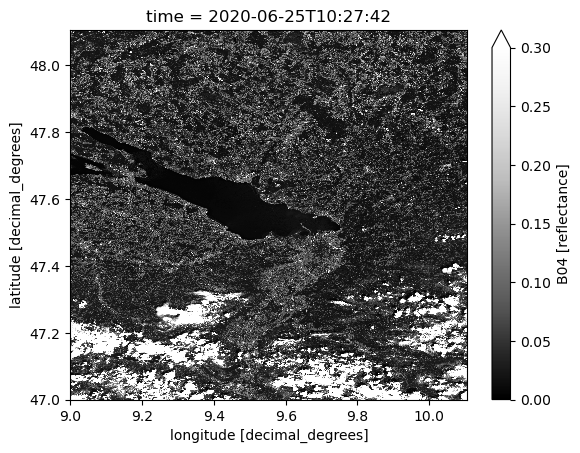

In [17]:
ds.B04.isel(time=70).plot.imshow(vmin=0, vmax=0.3, cmap="Greys_r")

Here begins the second part namely the calculation of the spectral indices! 

Firstly, we filter the dataset where no data is available or where observation is saturated or defective. 

In [21]:
scene_classif = MaskSet(ds.SCL)
scene_classif

Flag name,Mask,Value
no_data,None,0
saturated_or_defective,None,1
dark_area_pixels,None,2
cloud_shadows,None,3
vegetation,None,4
bare_soils,None,5
water,None,6
clouds_low_probability_or_unclassified,None,7
clouds_medium_probability,None,8
clouds_high_probability,None,9


In [22]:
ds = ds.where(~scene_classif.no_data & ~scene_classif.saturated_or_defective)
ds

<xarray.Dataset> Size: 287GB
Dimensions:    (time: 146, lat: 6144, lon: 6144, bnds: 2)
Coordinates:
  * lat        (lat) float64 49kB 48.11 48.11 48.11 48.11 ... 47.0 47.0 47.0
  * lon        (lon) float64 49kB 9.0 9.0 9.0 9.001 ... 10.11 10.11 10.11 10.11
  * time       (time) datetime64[ns] 1kB 2020-01-02T10:27:34 ... 2020-12-30T1...
    time_bnds  (time, bnds) datetime64[ns] 2kB dask.array<chunksize=(146, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables: (12/13)
    B01        (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    B02        (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    B03        (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    B04        (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    B05        (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    B06        (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    ...         ...
    B08        (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    B09        (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    B11        (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    B12        (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    B8A        (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    SCL        (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   S2L2A Data Cube Subset
    history:                 [{'program': 'xcube_sh.chunkstore.SentinelHubChu...
    date_created:            2024-05-17T14:55:01.397072
    time_coverage_start:     2020-01-02T10:27:25.374000+00:00
    time_coverage_end:       2020-12-30T10:37:45.795000+00:00
    time_coverage_duration:  P363DT0H10M20.421S
    geospatial_lon_min:      9
    geospatial_lat_min:      47
    geospatial_lon_max:      10.10592
    geospatial_lat_max:      48.10592
    processing_level:        L2A

Next, we evaluate the spectral indices on the fly. Hereby, we need to set up the link between the [expressions](https://github.com/awesome-spectral-indices/awesome-spectral-indices?tab=readme-ov-file#expressions) and the Sentinel-2 band data and parameters stored in [Constants](https://spyndex.readthedocs.io/en/latest/stubs/spyndex.axioms.Constants.html#spyndex.axioms.Constants). 

In [26]:
def compute_spectral_indices(ds):
    indices = list(spyndex.indices.keys())

    # remove indices which are not provided by Sentinel-2
    for index in indices.copy():
        if "Sentinel-2" not in spyndex.indices.get(index).platforms:
            indices.remove(index)

    # remove index NIRvP, which needs Photosynthetically Available Radiation (PAR)
    # note that PAR is given by Sentinel-3 Level 2
    indices.remove("NIRvP")

    # prepare the parameters for the mapping from expressions to data
    band_translator = translate_bands()
    params = {}
    for band in band_translator.keys():
        params[band] = ds[band_translator[band]]

    extra = dict(
        # Kernel parameters
        kNN=1.0,
        kGG=1.0,
        kNR=spyndex.computeKernel(
            kernel='RBF',
            a=ds[band_translator["N"]],
            b=ds[band_translator["R"]],
            sigma=(((ds[band_translator["N"]] + ds[band_translator["R"]]) / 2)
                   .median(dim=['lat', 'lon']))
        ),
        kNB=spyndex.computeKernel(
            kernel='RBF',
            a=ds[band_translator["N"]],
            b=ds[band_translator["B"]],
            sigma=(((ds[band_translator["N"]] + ds[band_translator["B"]]) / 2)
                   .median(dim=['lat', 'lon']))
        ),
        kNL=spyndex.computeKernel(
            kernel='RBF',
            a=ds[band_translator["N"]],
            b=spyndex.constants.L.default,
            sigma=(((ds[band_translator["N"]] + spyndex.constants.L.default) / 2)
                   .median(dim=['lat', 'lon']))
        ),
        kGR=spyndex.computeKernel(
            kernel='RBF',
            a=ds[band_translator["G"]],
            b=ds[band_translator["R"]],
            sigma=(((ds[band_translator["G"]] + ds[band_translator["R"]]) / 2)
                   .median(dim=['lat', 'lon']))
        ),
        kGB=spyndex.computeKernel(
            kernel='RBF',
            a=ds[band_translator["G"]],
            b=ds[band_translator["B"]],
            sigma=(((ds[band_translator["G"]] + ds[band_translator["B"]]) / 2)
                   .median(dim=['lat', 'lon']))
        ),

        # Additional parameters
        L=spyndex.constants.L.default,
        C1=spyndex.constants.C1.default,
        C2=spyndex.constants.C2.default,
        g=spyndex.constants.g.default,
        gamma=spyndex.constants.gamma.default,
        alpha=spyndex.constants.alpha.default,
        sla=spyndex.constants.sla.default,
        slb=spyndex.constants.slb.default,
        nexp=spyndex.constants.nexp.default,
        cexp=spyndex.constants.cexp.default,
        k=spyndex.constants.k.default,
        fdelta=spyndex.constants.fdelta.default,
        epsilon=spyndex.constants.epsilon.default,
        omega=spyndex.constants.omega.default,
        beta=spyndex.constants.beta.default,

        # Wavelength parameters
        lambdaN=spyndex.bands.N.modis.wavelength,
        lambdaG=spyndex.bands.G.modis.wavelength,
        lambdaR=spyndex.bands.R.modis.wavelength,
    )
    params.update(extra)

    # calculate indices
    indices = spyndex.computeIndex(index=indices, params=params)

    return indices


da_si = compute_spectral_indices(ds)
da_si

<xarray.DataArray (index: 197, time: 146, lat: 6144, lon: 6144)> Size: 4TB
dask.array<concatenate, shape=(197, 146, 6144, 6144), dtype=float32, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 49kB 48.11 48.11 48.11 48.11 ... 47.0 47.0 47.0 47.0
  * lon      (lon) float64 49kB 9.0 9.0 9.0 9.001 ... 10.11 10.11 10.11 10.11
  * time     (time) datetime64[ns] 1kB 2020-01-02T10:27:34 ... 2020-12-30T10:...
  * index    (index) <U13 10kB 'AFRI1600' 'AFRI2100' ... 'mND705' 'mSR705'

If one wants to have a data set with the spectral indices stored into the different variable, one can run the following:

In [29]:
ds_si = da_si.to_dataset(dim="index")
ds_si

<xarray.Dataset> Size: 4TB
Dimensions:        (time: 146, lat: 6144, lon: 6144)
Coordinates:
  * lat            (lat) float64 49kB 48.11 48.11 48.11 48.11 ... 47.0 47.0 47.0
  * lon            (lon) float64 49kB 9.0 9.0 9.0 9.001 ... 10.11 10.11 10.11
  * time           (time) datetime64[ns] 1kB 2020-01-02T10:27:34 ... 2020-12-...
Data variables: (12/197)
    AFRI1600       (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    AFRI2100       (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    ANDWI          (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    ARI            (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    ARI2           (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    ARVI           (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    ...             ...
    kIPVI          (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    kNDVI          (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    kRVI           (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    kVARI          (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    mND705         (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    mSR705         (time, lat, lon) float32 22GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>

Lastly, we load the data and plot the result for the Difference Vegetation Index (DVI) at one time step as an example.

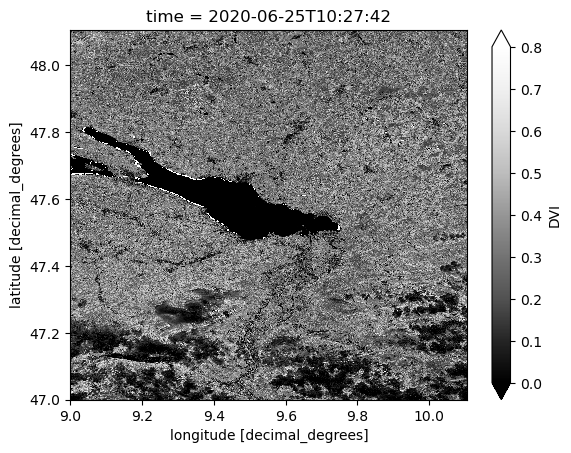

In [30]:
ds_si.DVI.isel(time=70).plot.imshow(vmin=0., vmax=0.8, cmap="Greys_r")